In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

Tasks
Find the linear regression equation for this data.
Chart the original data and the equation on the chart.
Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
Extrapolate data: If the ground temperature reached 95° F, then at what approximate rate would you expect the crickets to be chirping?
Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?


In [33]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [46]:
df[['Chirps/Second']].head()

,Chirps/Second
0,20.0
1,16.0
2,19.8
3,18.4
4,17.1


In [35]:
cps = list(df.get('Chirps/Second'))

In [36]:
cps

[20.0,
 16.0,
 19.800000000000001,
 18.399999999999999,
 17.100000000000001,
 15.5,
 14.699999999999999,
 15.699999999999999,
 15.4,
 16.300000000000001,
 15.0,
 17.199999999999999,
 16.0,
 17.0,
 14.4]

In [37]:
xcps = np.array(cps)

In [38]:
xcps

array([ 20. ,  16. ,  19.8,  18.4,  17.1,  15.5,  14.7,  15.7,  15.4,
        16.3,  15. ,  17.2,  16. ,  17. ,  14.4])

In [39]:
gt = list(df.get('Ground Temperature'))

In [70]:
xgt = np.array(gt)

In [74]:
xgt

array([ 88.6,  71.6,  93.3,  84.3,  80.6,  75.2,  69.7,  71.6,  69.4,
        83.3,  79.6,  82.6,  80.6,  83.5,  76.3])

The x Coefficient is: [[ 0.20299973]]
  The y Intercept is: [ 0.45931465]
  The Rsq (score) is: 0.6922946529146998

An extrapolation example with 95 deg F ground temp results in: [[ 19.74428913]] chirps per second.
An interpolation example with 18 chirps detected results in: [[ 86.40743135]] ground temp.


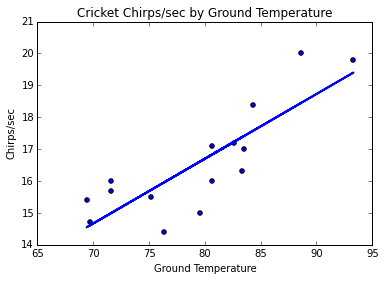

In [94]:
plt.scatter(df[['Ground Temperature']],df[['Chirps/Second']])
plt.title("Cricket Chirps/sec by Ground Temperature")
rline = linear_model.LinearRegression()
rline.fit(df[['Ground Temperature']],df[['Chirps/Second']])
plt.plot(df[['Ground Temperature']],
         rline.predict(df[['Ground Temperature']]), 
         color='blue', 
         linewidth = 2)
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/sec")

print("The x Coefficient is: {}".format(rline.coef_))
print("  The y Intercept is: {}".format(rline.intercept_))
print("  The Rsq (score) is: {}".format(rline.score(df[['Ground Temperature']],df[['Chirps/Second']])))

chirp = (95 * rline.coef_) + rline.intercept_

print("\nAn extrapolation example with 95 deg F ground temp results in: {} chirps per second.".format(chirp))

temp = (18 - rline.intercept_) / rline.coef_

print("An interpolation example with 18 chirps detected results in: {} ground temp.".format(temp))


In [76]:
rline = linear_model.LinearRegression()
rline.fit(df[['Chirps/Second']],df[['Ground Temperature']])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
print(rline.coef_, rline.intercept_)

[[ 3.410323]] [ 22.84898231]


In [50]:
print(rline.score(df[['Chirps/Second']],df[['Ground Temperature']]))

0.692294652915


In [79]:
dff = pd.read_fwf("brain_body.txt")

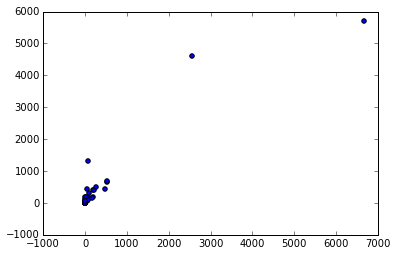

In [85]:
plt.scatter(dff[['Brain']],dff[['Body']])

The x Coefficient is: [[ 0.96649637]]
  The y Intercept is: [ 91.00439621]
  The Rsq (score) is: 0.8726620843043331


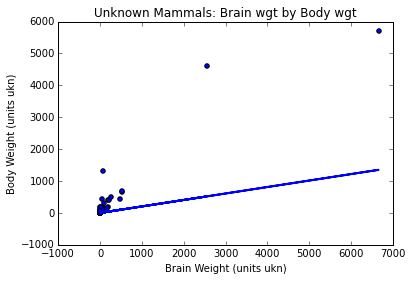

In [97]:
plt.scatter(dff[['Brain']],dff[['Body']])
plt.title("Unknown Mammals: Brain wgt by Body wgt")
rrline = linear_model.LinearRegression()
rrline.fit(dff[['Brain']],dff[['Body']])
plt.plot(dff[['Brain']],
         rline.predict(dff[['Brain']]), 
         color='blue', 
         linewidth = 2)
plt.xlabel("Brain Weight (units ukn)")
plt.ylabel("Body Weight (units ukn)")

print("The x Coefficient is: {}".format(rrline.coef_))
print("  The y Intercept is: {}".format(rrline.intercept_))
print("  The Rsq (score) is: {}".format(rrline.score(dff[['Brain']],dff[['Body']])))

There are two very large outliers; likely a whale and an elephant (unverified)
The linear model was run again without the largest two values

The x Coefficient is: [[ 1.24271276]]
  The y Intercept is: [ 55.95185719]
  The Rsq (score) is: 0.42322727989153086


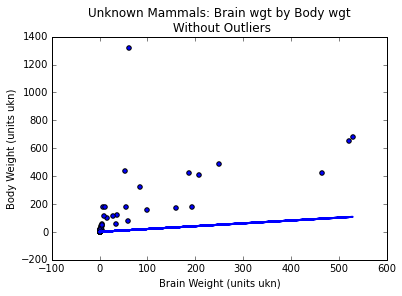

In [98]:
print("There are two very large outliers; likely a whale and an elephant (unverified)")
print("The linear model was run again without the largest two values\n")

dffm = dff[dff.Brain <=2000]           # removed the two outliers. the DataFrame now is 'dffm'

plt.scatter(dffm[['Brain']],dffm[['Body']])
plt.title("Unknown Mammals: Brain wgt by Body wgt\n Without Outliers")
rrline = linear_model.LinearRegression()
rrline.fit(dffm[['Brain']],dffm[['Body']])
plt.plot(dffm[['Brain']],
         rline.predict(dffm[['Brain']]), 
         color='blue', 
         linewidth = 2)
plt.xlabel("Brain Weight (units ukn)")
plt.ylabel("Body Weight (units ukn)")

print("The x Coefficient is: {}".format(rrline.coef_))
print("  The y Intercept is: {}".format(rrline.intercept_))
print("  The Rsq (score) is: {}".format(rrline.score(dffm[['Brain']],dffm[['Body']])))

In [ ]:
print("The removal of outliers reduced the R squared score.")
print("Most of the mammal body wghts are < 200 and brain wghts are < 100.")
print("The linear regression line is a poor model for this data.")

(array([ 57.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([  1.40000000e-01,   5.71326000e+02,   1.14251200e+03,
          1.71369800e+03,   2.28488400e+03,   2.85607000e+03,
          3.42725600e+03,   3.99844200e+03,   4.56962800e+03,
          5.14081400e+03,   5.71200000e+03]),
 <a list of 10 Patch objects>)

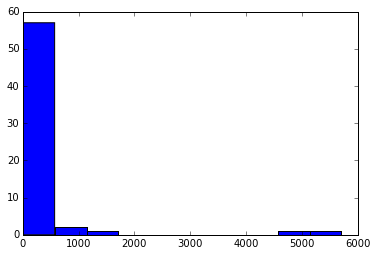

In [93]:
plt.hist(dff.Body)

In [88]:
temp = dff[dff.Brain <= 2000]

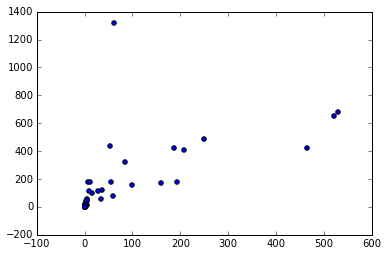

In [90]:
plt.scatter(temp[['Brain']],temp[['Body']])

In [99]:
dfff = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
'''
First ran some histograms to look at the data
'''

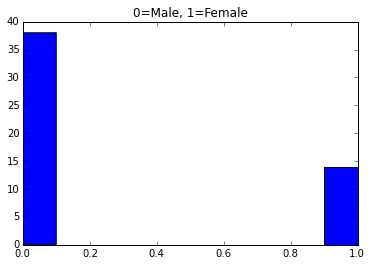

More than twice as many males as female Professors


In [146]:
plt.hist(dfff.Sex)
plt.title("0=Male, 1=Female")
plt.show()
print("More than twice as many males as female Professors")

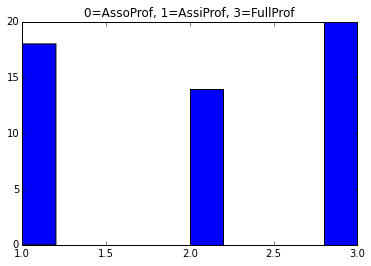

Rank distribution seems unremarkable


In [147]:
plt.hist(dfff.Rank)
plt.title("0=AssoProf, 1=AssiProf, 3=FullProf ")
plt.show()
print("Rank distribution seems unremarkable")

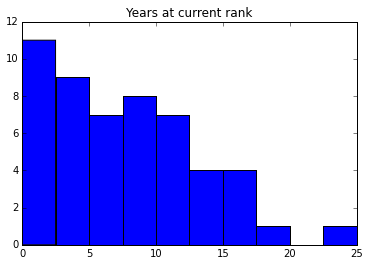

Years at rank covers many years
although the distribution seems reasonable.
The length of time at rank tapers over time.


In [150]:
plt.hist(dfff.Year)
plt.title("Years at current rank")
plt.show()
print("Years at rank covers many years\nalthough the distribution seems reasonable.")
print("The length of time at rank tapers over time.")

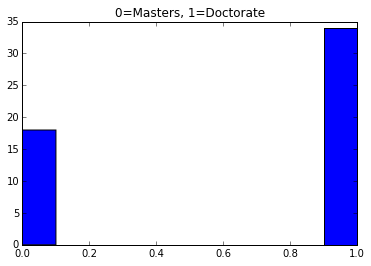

Twice as many Professors with PhDs than Masters


In [152]:
plt.hist(dfff.Degree)
plt.title('0=Masters, 1=Doctorate')
plt.show()
print("Twice as many Professors with PhDs than Masters")

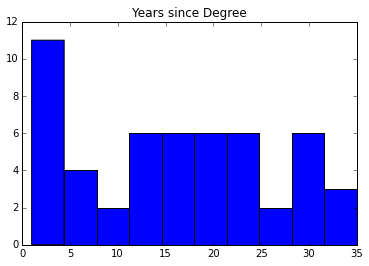

Flat distribution execept for high n < 5 yrs.
Covers 35 years.


In [153]:
plt.hist(dfff.YSdeg)
plt.title("Years since Degree")
plt.show()
print("Flat distribution execept for high n < 5 yrs.")
print("Covers 35 years.")

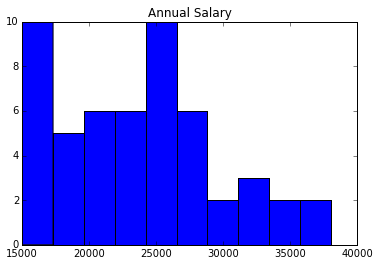

Bimodal salary peeks. One at lowest, One at midpoint.


In [154]:
plt.hist(dfff.Salary)
plt.title("Annual Salary")
plt.show()
print("Bimodal salary peeks. One at lowest, One at midpoint.")

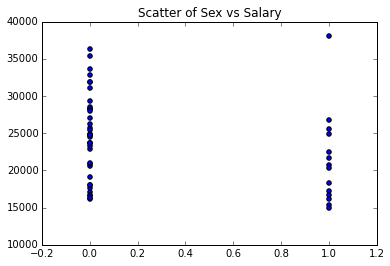

The highest salary goes to a woman. 
The rest of female salaries are < 27000.
Scatter data allows a visualization of salary distribution by gender.


In [156]:
plt.scatter(dfff.Sex, dfff.Salary)
plt.title("Scatter of Sex vs Salary")
plt.show()
print("The highest salary goes to a woman. \nThe rest of female salaries are < 27000.")
print("Scatter data allows a visualization of salary distribution by gender.")

In [163]:
dfff = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex",             # 1 = female, 0 = male
                        "Rank",            # 1 = assoProf, 2 = assiProf, 3 = fullProf
                        "Year",            # Years in current rank
                        "Degree",          # 1 = Doctorate, 0 = Masters
                        "YSdeg",           # Years since grad of highest deg
                        "Salary"]          # annual salary
                  )

input = dfff[['Sex','Rank','Year','Degree','YSdeg']]
output = dfff['Salary']                    # how important is 'sex' in predicting salary?
regrm = linear_model.LinearRegression()
regrm.fit(input, output)

print("Coefficients for Sex, Rank, Year, Degree, YSdeg; followed by Y-intercept:\n")
print(regrm.coef_,regrm.intercept_)
print("\nRsq: {} ".format(regrm.score(input, output)))

Coefficients for Sex, Rank, Year, Degree, YSdeg; followed by Y-intercept:

[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354] 11410.1465473

Rsq: 0.8547180674410969 


In [160]:
'''
Removed the YSdeg (Years since graduation) since seemed least relevant.
'''

dfffm = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex",             # 1 = female, 0 = male
                        "Rank",            # 1 = assoProf, 2 = assiProf, 3 = fullProf
                        "Year",            # Years in current rank
                        "Degree",          # 1 = Doctorate, 0 = Masters
                        "Salary"]          # annual salary
                  )

inputm = dfffm[['Sex','Rank','Year','Degree']]
outputm = dfffm['Salary']                    # how important is 'sex' in predicting salary?

regrm = linear_model.LinearRegression()
regrm.fit(inputm, outputm)
print("Coefficients for Sex, Rank, Year, Degree; followed by Y-intercept:\n")
print(regrm.coef_,regrm.intercept_)
print("\nRsq: {} ".format(regrm.score(inputm, outputm)))

Coefficients for Sex, Rank, Year, Degree; followed by Y-intercept:

[ 5270.22591237   422.39449213  -892.71773473   -84.28239939] 11836.6086445

Rsq: 0.8485077204335425 


In [164]:
'''
Highest paid woman may be skewing the results.
Removed the row with highest paid woman.
'''

dffftrim = dfffm[dfffm.Salary != 38045]      # removed the highest paid female, reran last model.
inputtr = dffftrim[['Sex','Rank','Year','Degree']]
outputtr = dffftrim['Salary']                    # how important is 'sex' in predicting salary?

regrm = linear_model.LinearRegression()
regrm.fit(inputtr, outputtr)
print("Coefficients for Sex, Rank, Year, Degree; followed by Y-intercept:\n")
print(regrm.coef_,regrm.intercept_)
print("\nHighest Rsq: {} ".format(regrm.score(inputtr, outputtr)))
print("\nThe gender coefficient = 5197.  Male = 0, Female = 1, in the model.")
print("A female adds 5197 to the salary; a male adds nothing.")
print("\nThe model:")
print("[Sex]*5197.1 + [Rank]*465.9 + [Year]*-1570.6 + [Degree]*-126.2 + 12573.1 = SALARY")


Coefficients for Sex, Rank, Year, Degree; followed by Y-intercept:

[ 5197.07109859   465.87889541 -1570.61132108  -126.24660815] 12573.1319671

Highest Rsq: 0.8963163112028344 

The gender coefficient = 5197.  Male = 0, Female = 1, in the model.
A female adds 5197 to the salary; a male adds nothing.

The model:
[Sex]*5197.1 + [Rank]*465.9 + [Year]*-1570.6 + [Degree]*-126.2 + 12573.1 = SALARY

The model captures 89.6% of the variance


In [ ]:
inputm